# Heart Stroke Prediction

This project aims to build a predictive machine learning model that can identify individuals at risk of stroke based on their demographic and health-related features. By detecting high-risk individuals early, appropriate preventive measures can be taken to reduce the occurence and impact of stroke.


DATA DICTIONARY :-

1. id: Unique identifier
2. gender: "Male", "Female", or "Other"    
3. age: Age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "Children", "Govt_job", "Never_worked", "Private", or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: Average glucose level in the blood
10. bmi: Body mass index
11. smoking_status: "Formerly smoked", "Never smoked", "Smokes", or "Unknown"
12. stroke: 1 if the patient had a stroke, 0 if not

## Importing libraries

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## Understanding the dataset

In [2]:
#Loading the dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4502,29276,Male,3.0,0,0,No,children,Urban,72.76,18.8,Unknown,0
3565,68302,Female,40.0,0,0,Yes,Private,Urban,65.77,31.2,never smoked,0
4249,56692,Female,65.0,0,0,Yes,Self-employed,Urban,248.24,27.0,smokes,0
348,28102,Female,25.0,0,0,No,Private,Rural,66.30,27.2,never smoked,0
375,64489,Male,56.0,0,0,Yes,Govt_job,Rural,73.02,31.1,never smoked,0


Remove 'id' column bcoz it is not useful in extracting any insights

In [3]:
df.drop(columns='id', inplace=True)

### Getting the total no. of rows and columns

In [4]:
df.shape

(5110, 11)

### Getting an overview of all the columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [6]:
df['age'].astype(int)                              # change from the data type 'float' to 'int' to reduce memory usage

0       67
1       61
2       80
3       49
4       79
        ..
5105    80
5106    81
5107    35
5108    51
5109    44
Name: age, Length: 5110, dtype: int32

### Checking for null/missing values

In [7]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
# finding the percentage of null values in 'bmi' column

(df['bmi'].isnull().sum()/len(df))*100

3.9334637964774952

Since, the 'bmi' column is having null values greater than 2% so I will impute them with suitable value.

<Axes: xlabel='bmi', ylabel='Count'>

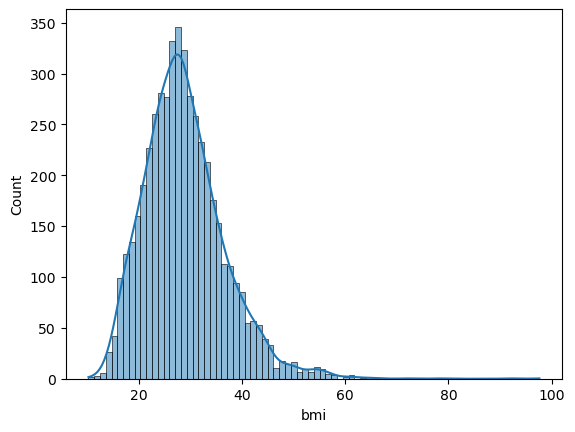

In [9]:
sns.histplot(df['bmi'],kde=True)

In [13]:
df['bmi'].mean(),df['bmi'].median(),df['bmi'].mode()[0]

(28.893236911794666, 28.1, 28.7)

The 'bmi' column graph is somewhat positively skewed. So, I will replace all the null values with its median bcoz it is not affected by the outliers present in the data.

In [14]:
# replacing the missing values with the median
df['bmi'].fillna(df['bmi'].median(), inplace=True) 

### Checking for the duplicate rows ->

In [15]:
df.duplicated().sum()

0

### Descriptive statistics of all the numerical columns->

In [57]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Descriptive statistics of all the categorical columns ->

In [58]:
df.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


## Exploratory Data Analysis

In the exploratory data analysis, I will try to understand the data. I will begin by looking at the distribution of data across the datset, followed by visualizing the data to understand the relationship between the features and the target variable.

### Univariate Analysis

<Axes: ylabel='count'>

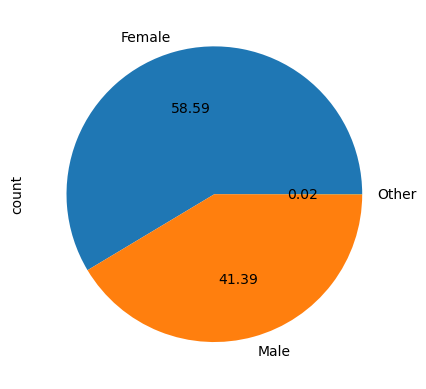

In [59]:
df['gender'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: xlabel='age', ylabel='Count'>

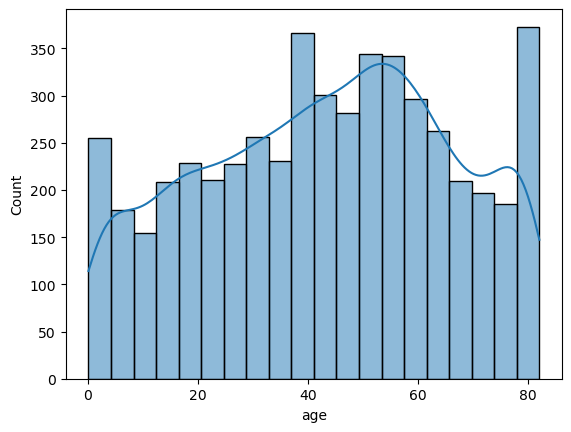

In [60]:
sns.histplot(data=df, x='age',kde=True)

<Axes: xlabel='ever_married', ylabel='count'>

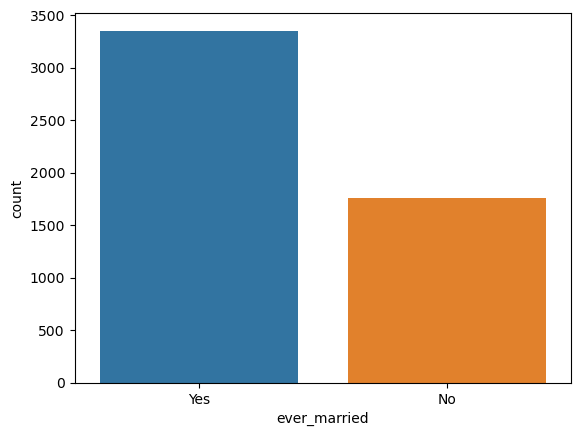

In [61]:
sns.countplot(data = df, x= 'ever_married')

<Axes: xlabel='work_type', ylabel='count'>

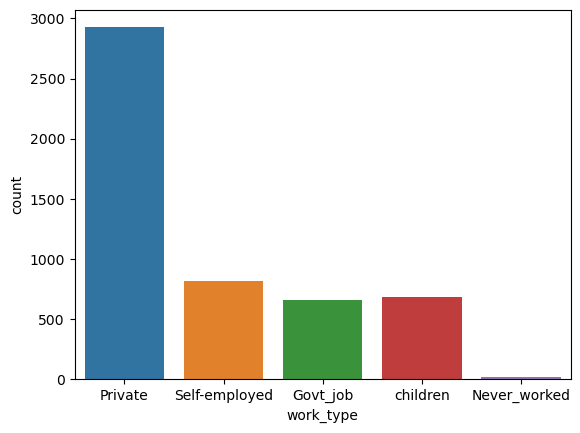

In [62]:
sns.countplot(data = df, x= 'work_type')

<Axes: xlabel='Residence_type', ylabel='count'>

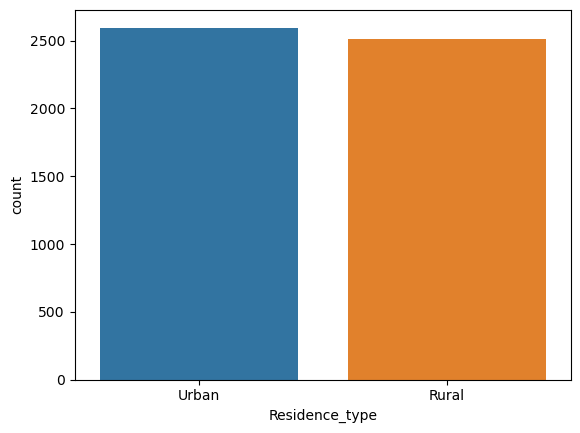

In [63]:
sns.countplot(data = df, x= 'Residence_type')

<Axes: xlabel='smoking_status', ylabel='count'>

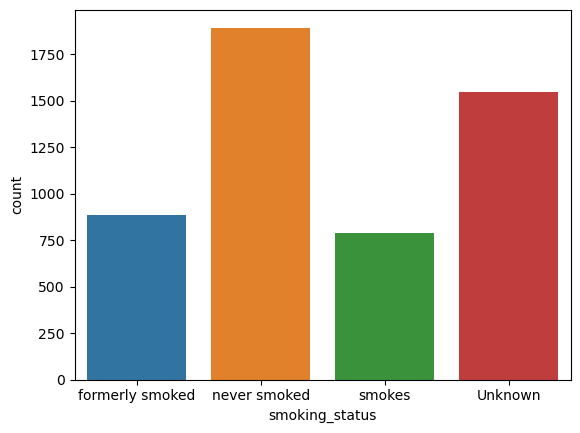

In [64]:
sns.countplot(data = df, x= 'smoking_status')

<Axes: ylabel='count'>

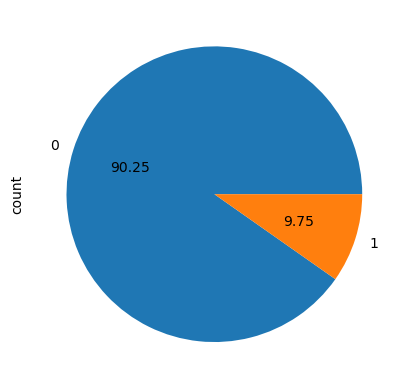

In [65]:
df['hypertension'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

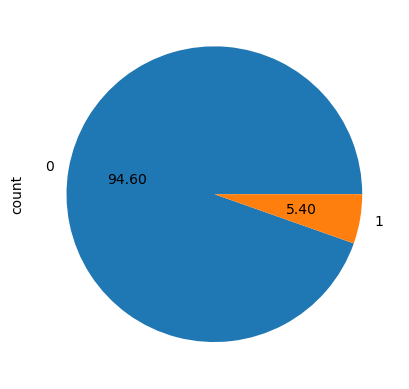

In [66]:
df['heart_disease'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

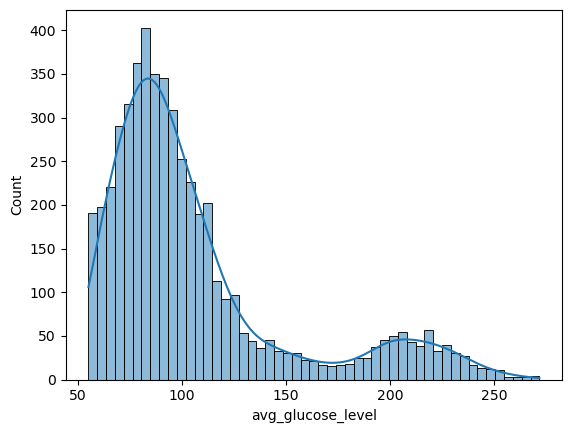

In [67]:
sns.histplot(data=df, x='avg_glucose_level',kde=True)

<Axes: xlabel='bmi', ylabel='Count'>

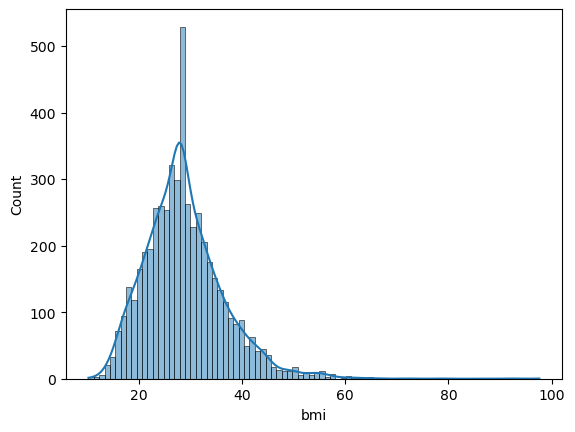

In [68]:
sns.histplot(data=df, x='bmi',kde=True)

### Bivariate Analysis

<Axes: xlabel='bmi', ylabel='avg_glucose_level'>

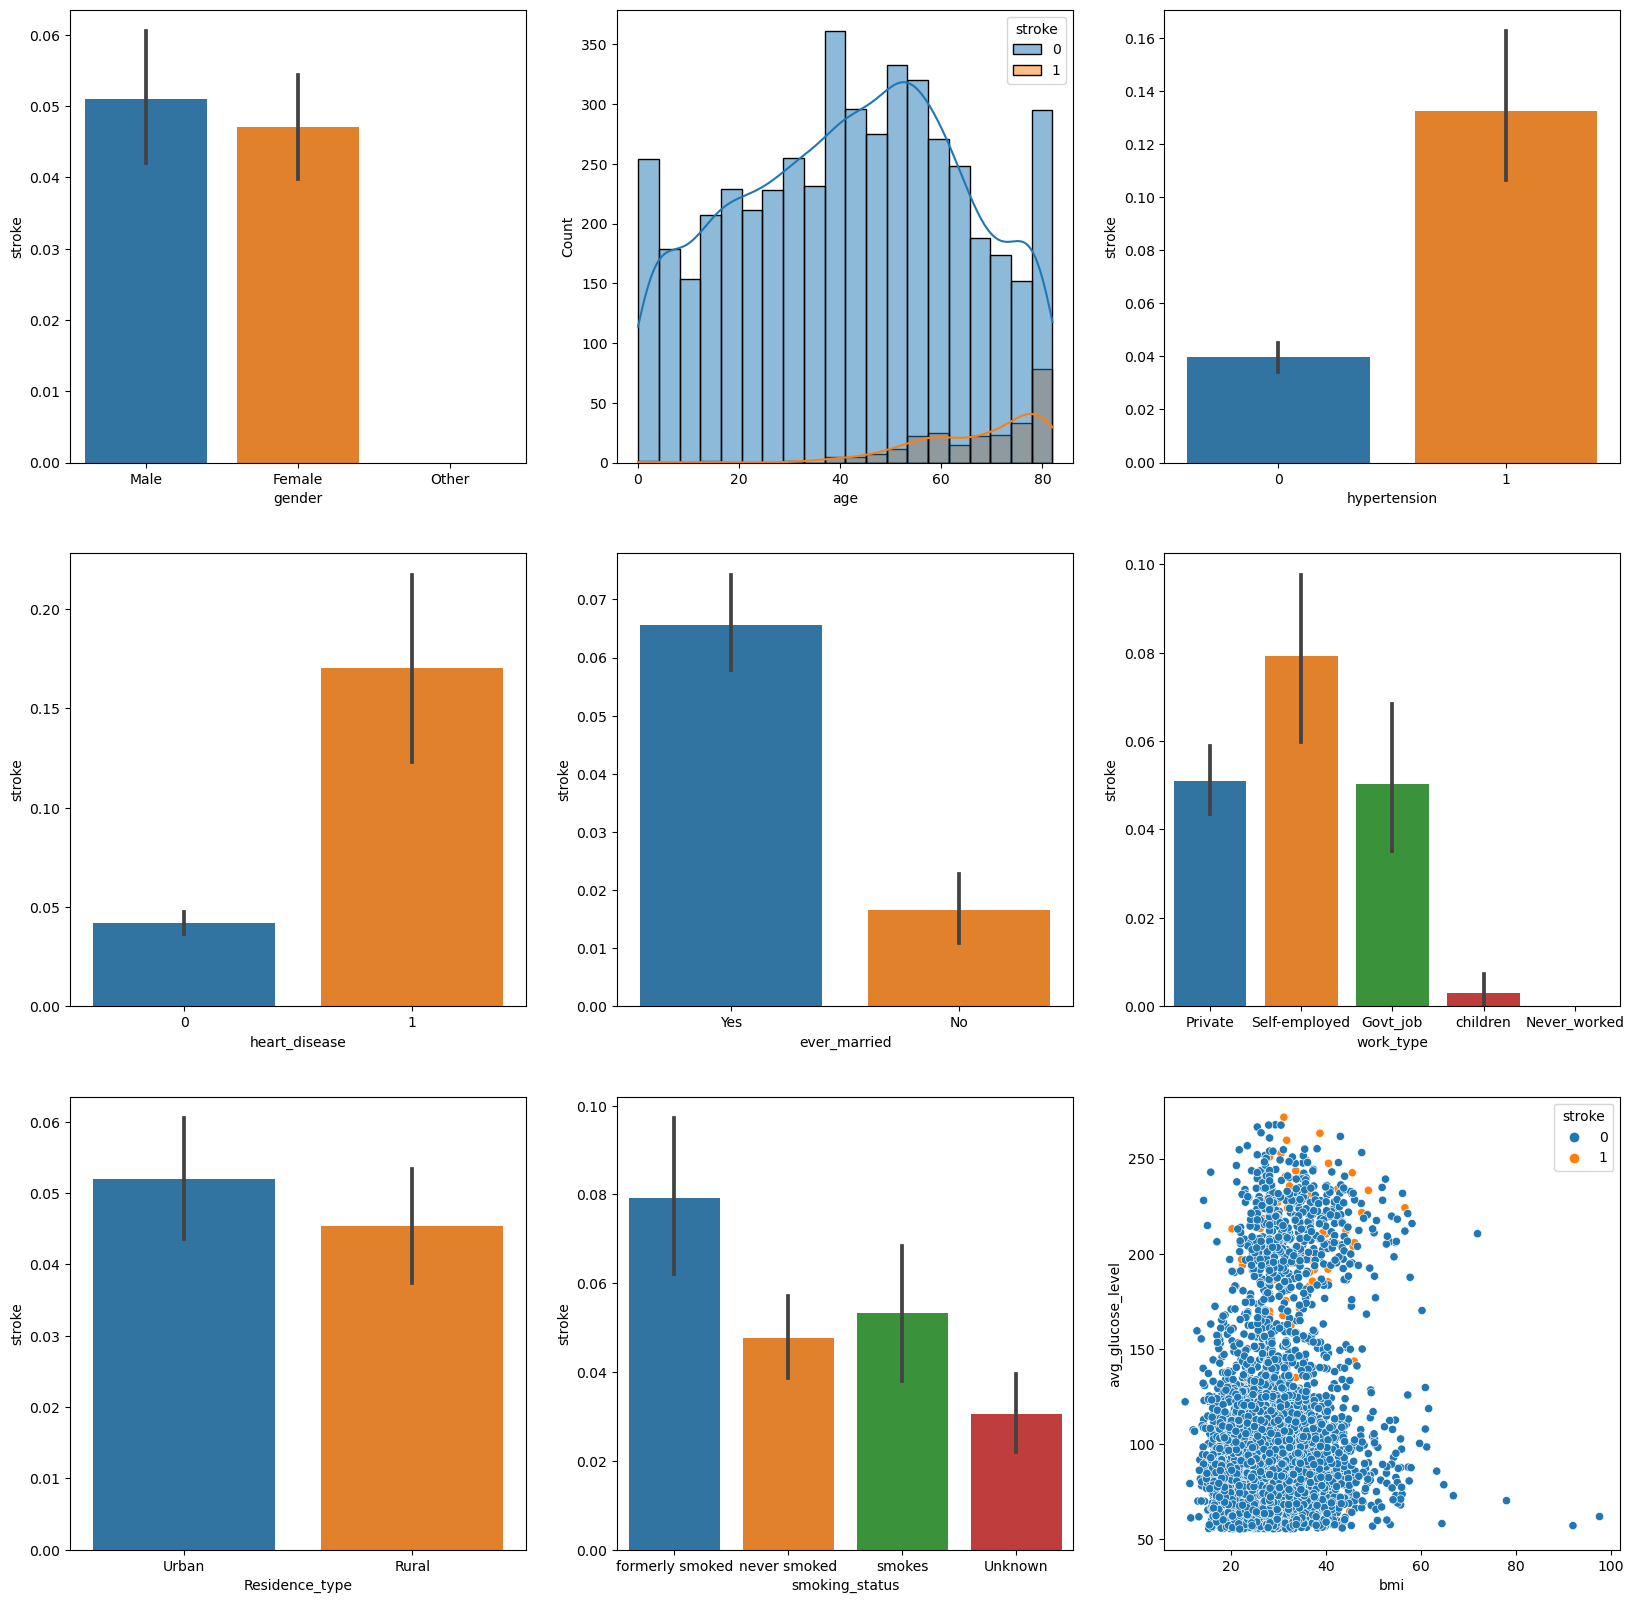

In [69]:
fig, ax = plt.subplots(3,3,figsize=(20,20))

sns.barplot(data = df,x = 'gender', y = 'stroke', ax=ax[0,0])
sns.histplot(x = 'age', data = df,hue = 'stroke',kde=True, ax=ax[0,1])
sns.barplot(data = df,x = 'hypertension', y = 'stroke', ax=ax[0,2])

sns.barplot(data = df,x = 'heart_disease', y = 'stroke', ax=ax[1,0])
sns.barplot(data = df,x = 'ever_married', y = 'stroke', ax=ax[1,1])
sns.barplot(data = df,x = 'work_type',y = 'stroke', ax=ax[1,2])

sns.barplot(data = df,x = 'Residence_type', y = 'stroke', ax=ax[2,0])
sns.barplot(data = df,x = 'smoking_status', y = 'stroke', ax=ax[2,1])
sns.scatterplot(data = df,x = 'bmi', y = 'avg_glucose_level', hue = 'stroke', ax=ax[2,2])



-> Males are having slightly higher chances of having a stroke.

-> People with ages greater than 40 are having chances of stroke and people in their 80s are having maximum chances of stroke.

-> People who are having Hypertension or heart disease have very higher chances of stroke about 14 - 15%.

-> Ever married people are having higher chances of stroke.

-> Self employed people have higher chances of stroke.

-> People living in urban area have higher chances of stroke.

-> People who have formerly smoked have higher chances of getting a stroke as compared people who smokes.

-> People wth bmi between 30 to 60 have higher chances of getting stroke.

-> As avg glucose level increases, the chances of getting stroke also increases.

## Balance the data

In [70]:
df.shape

(5110, 11)

In [71]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

<Axes: xlabel='stroke'>

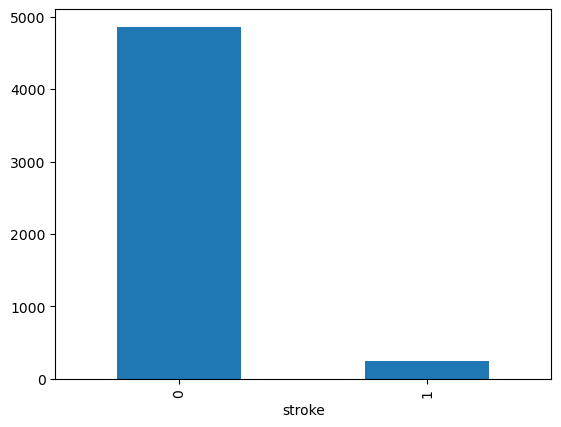

In [72]:
df['stroke'].value_counts().plot(kind='bar')

This is the case of imbalanced dataset

In [73]:
stroke_df = df[df['stroke']==1]
stroke_df.shape

(249, 11)

In [74]:
no_stroke_df = df[df['stroke']==0]
no_stroke_df.shape

(4861, 11)

#### selecting 300 rows from no_stroke_df

In [75]:
no_stroke_df1 = no_stroke_df.sample(300)
no_stroke_df1.shape

(300, 11)

### Creating new balanced dataset

In [76]:
df_new = pd.concat([stroke_df,no_stroke_df1],axis=0)
df_new.shape

(549, 11)

<Axes: xlabel='stroke'>

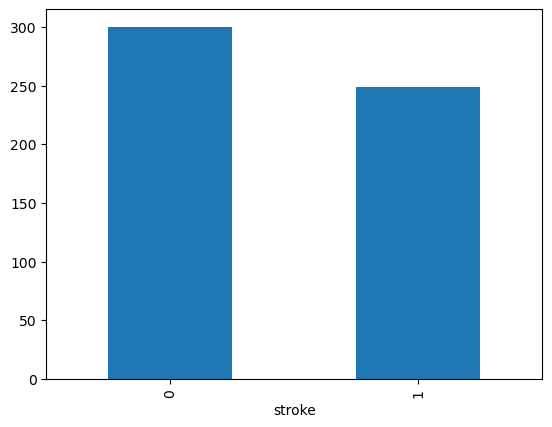

In [77]:
df_new['stroke'].value_counts().plot(kind='bar')

Now, the dataset is balanced

## Feature Engineering

### Label encoding the categorical columns

In [78]:
# Fetching categorical columns
cols = df_new.select_dtypes(include ='object').columns
cols

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [79]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in cols:
    
    df_new[i] = le.fit_transform(df_new[i])
    
    print(i, df_new[i].unique()) 

gender [1 0]
ever_married [1 0]
work_type [2 3 0 4 1]
Residence_type [1 0]
smoking_status [1 2 3 0]


## Feature scaling


Bringing all the numeric columns on the same scale using Standardization or Normalization

In [84]:
cols=['age','avg_glucose_level','bmi']    # getting all the numeric cols that we want to be scaled


In [85]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()


df_new[cols]=ss.fit_transform(df_new[cols])

df_new.head()
   

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.618212,0,1,1,2,1,2.079061,1.061031,1,1
1,0,0.348394,0,0,1,3,0,1.587779,-0.196922,2,1
2,1,1.202817,0,1,1,2,0,-0.198684,0.454254,2,1
3,0,-0.191241,0,0,1,2,1,1.013009,0.735444,3,1
4,0,1.157848,1,0,1,3,0,1.066627,-0.803699,2,1


### Find correlation of the target variable with the input variables

In [86]:
df_new.corr()['stroke']

gender               0.068239
age                  0.593052
hypertension         0.221613
heart_disease        0.253660
ever_married         0.231752
work_type           -0.100673
Residence_type       0.032068
avg_glucose_level    0.269016
bmi                  0.088955
smoking_status       0.069402
stroke               1.000000
Name: stroke, dtype: float64

From the above analysis, we can say that age, previous diseases like hypertension or heart disease, marital status and 
average glucose level have significant role in stroke prediction. 

### Find correlation between the input variables 

<Axes: >

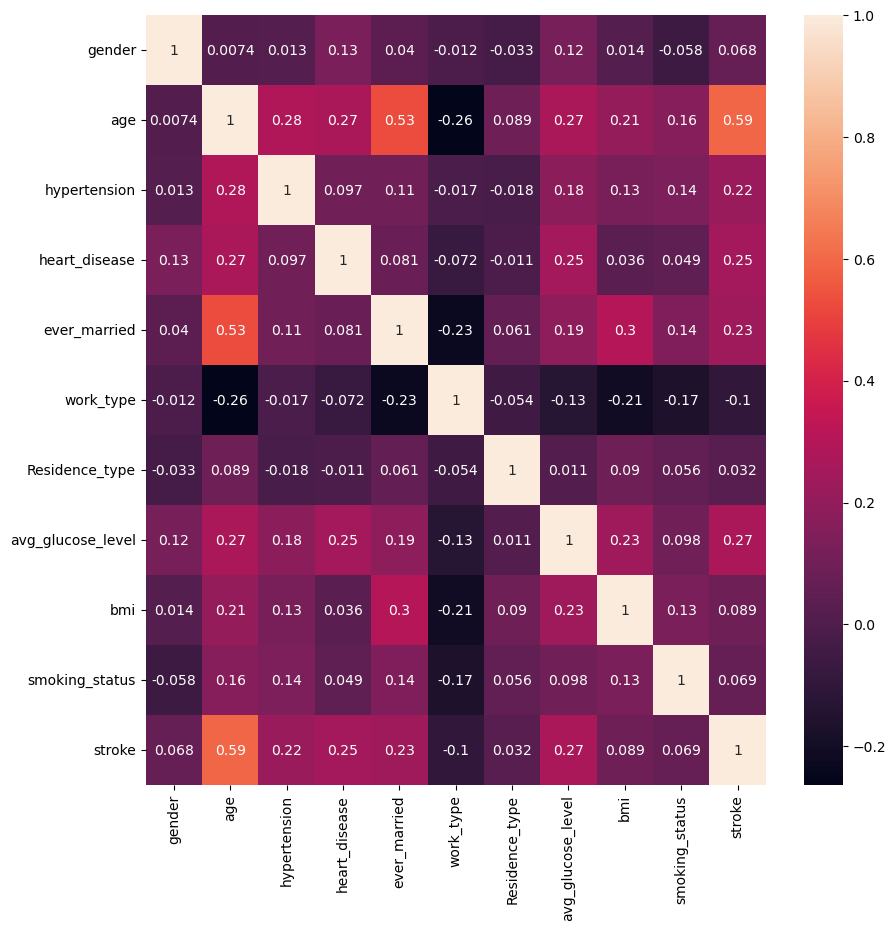

In [87]:
plt.figure(figsize=(10,10))
sns.heatmap(df_new.corr(), annot=True)  

## Train Test Split

In [88]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(df_new.drop('stroke', axis=1), df_new['stroke'], test_size=0.2, random_state=42)

### Model Building 

In [89]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

LogisticRegression()

### Model Training

In [90]:
#training the model
lr.fit(X_train, y_train)


LogisticRegression()

### Model Predicting

In [91]:
#testing the model
y_pred = lr.predict(X_test)

## Model Evaluation

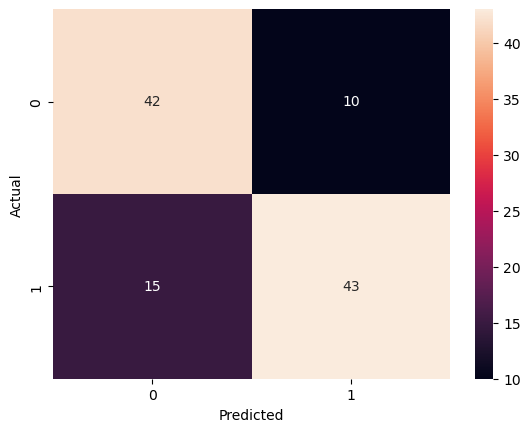

In [92]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


In [52]:
print('Accuracy Score:',accuracy_score(y_test, y_pred))
print('Precision score: ',precision_score(y_test, y_pred))
print('Recall score: ',recall_score(y_test, y_pred))
print('F1 score: ',f1_score(y_test, y_pred))

Accuracy Score: 0.7727272727272727
Precision score:  0.8
Recall score:  0.7586206896551724
F1 score:  0.7787610619469026


## Conclusion

-> The model accuracy of Logistic Regression is 77.2 %.So, we can use this model to predict the chances of heart stroke for an individual.

-> The people with other diseases like hypertension and heart disease have increased chances of stroke.

-> Former smokers have higher chances of stroke than continued smokers, maybe for the first few years of quitting smoking and then it gradually decreases. 

-> Person having BMI between 30 to 60 have higher chances of stroke, because they are overweight or obese.

-> People with high average glucose level i.e greater than 150 are at risk of getting stroke.

-> Other features such as martial status, residence type as well as work type are showing significant effect on the chances of stroke.